In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Data Set/ CKU MEN Provision.xlsx",sheet_name="Sheet2",index_col="Month")

#df.index.freq="MS"

In [ ]:
df=df[["Provision"]]
df.tail()

,Provision
Month,
2022-05-22,12924.35
2022-06-22,17359.68
2022-07-22,67986.32
2022-08-22,87916.39
2022-09-22,49919.38


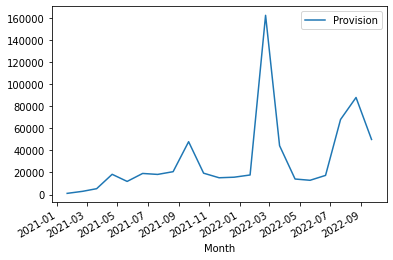

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# results = seasonal_decompose(df)
# results.plot()

In [ ]:
len(df)

21

In [ ]:
train=df.iloc[:17]
test=df.iloc[17:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head() , df.tail()

(            Provision
 Month                
 2021-01-21    1081.28
 2021-02-21    2934.03
 2021-03-21    5320.61
 2021-04-21   18332.87
 2021-05-21   11902.51,             Provision
 Month                
 2022-05-22   12924.35
 2022-06-22   17359.68
 2022-07-22   67986.32
 2022-08-22   87916.39
 2022-09-22   49919.38)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test= scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.        ],
       [0.01148908],
       [0.02628848],
       [0.10697873],
       [0.06710346],
       [0.11182017],
       [0.10641034],
       [0.12175997],
       [0.29016146],
       [0.11336815]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
results=seasonal_

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
print (len(scaled_train), len(generator))

17 14


In [ ]:
X,y = generator [0]
print (f'Given the Array: \n{X. flatten()}')
print (f'Predict this y: \n {y}')

Given the Array: 
[0.         0.01148908 0.02628848]
Predict this y: 
 [[0.10697873]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM (100, activation='relu', input_shape=(n_input, n_features )))
model.add(Dense (1))
model.compile (optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
5/5 [==============================] - 2s 8ms/step - loss: 0.2273
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.2127
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1961
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1821
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1738
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1656
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1471
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1498
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1376
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1388
Epoch 11/50
5/5 [==============================] - 0s 9ms/step - loss: 0.1366
Epoch 12/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1350
Epoch 13/50
5/5 [==============================] - 0s 7ms/step - loss: 0.

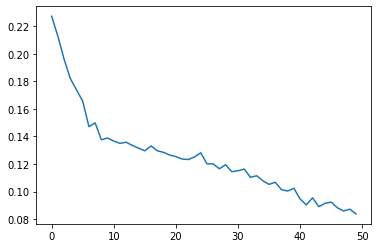

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 211ms/step


array([[-0.00519264]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.10094389])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
test_predictions

[array([-0.00519264], dtype=float32),
 array([-0.02503905], dtype=float32),
 array([-0.01248239], dtype=float32),
 array([0.02200072], dtype=float32)]

In [ ]:
test.head()

,Provision
Month,
2022-06-22,17359.68
2022-07-22,67986.32
2022-08-22,87916.39
2022-09-22,49919.38


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-40-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


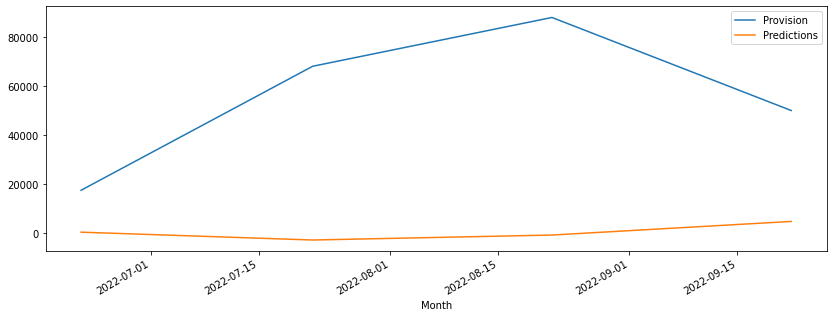

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Provision'],test['Predictions']))
print(rmse)

61787.98793043059
